In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
#print(url)

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
coordinates = zip(lats, lngs)
coordinates

In [3]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

577

In [4]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saskylakh
Processing Record 2 of Set 1 | atuona
Processing Record 3 of Set 1 | pacific grove
Processing Record 4 of Set 1 | oktyabrskoye
Processing Record 5 of Set 1 | boa vista
Processing Record 6 of Set 1 | borama
City not found. Skipping...
Processing Record 7 of Set 1 | marcona
City not found. Skipping...
Processing Record 8 of Set 1 | cape town
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | kruisfontein
Processing Record 11 of Set 1 | los llanos de aridane
Processing Record 12 of Set 1 | jamestown
Processing Record 13 of Set 1 | bluff
Processing Record 14 of Set 1 | camacupa
Processing Record 15 of Set 1 | port alfred
Processing Record 16 of Set 1 | salalah
Processing Record 17 of Set 1 | bandarbeyla
Processing Record 18 of Set 1 | cabedelo
Processing Record 19 of Set 1 | tandil
Processing Record 20 of Set 1 | guerrero negro
Processing Record 21 of Set 1 | ryotsu
Proc

Processing Record 36 of Set 4 | turukhansk
Processing Record 37 of Set 4 | kikwit
Processing Record 38 of Set 4 | ugoofaaru
Processing Record 39 of Set 4 | balkhash
Processing Record 40 of Set 4 | walvis bay
Processing Record 41 of Set 4 | adrar
Processing Record 42 of Set 4 | kieta
Processing Record 43 of Set 4 | mizdah
Processing Record 44 of Set 4 | sao jose da coroa grande
Processing Record 45 of Set 4 | san quintin
Processing Record 46 of Set 4 | claveria
Processing Record 47 of Set 4 | pisco
Processing Record 48 of Set 4 | nizwa
Processing Record 49 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 50 of Set 4 | gornopravdinsk
Processing Record 1 of Set 5 | carauari
Processing Record 2 of Set 5 | east london
Processing Record 3 of Set 5 | kungurtug
Processing Record 4 of Set 5 | yulara
Processing Record 5 of Set 5 | port hardy
Processing Record 6 of Set 5 | marsh harbour
Processing Record 7 of Set 5 | biltine
Processing Record 8 of Set 5 | ruteng
Processing Record

Processing Record 27 of Set 8 | coquimbo
Processing Record 28 of Set 8 | vao
Processing Record 29 of Set 8 | nelson bay
Processing Record 30 of Set 8 | cuxhaven
Processing Record 31 of Set 8 | aleksandrovskoye
Processing Record 32 of Set 8 | wilmington
Processing Record 33 of Set 8 | karratha
Processing Record 34 of Set 8 | panguna
Processing Record 35 of Set 8 | soyo
Processing Record 36 of Set 8 | ronda
Processing Record 37 of Set 8 | inderborskiy
City not found. Skipping...
Processing Record 38 of Set 8 | kipini
Processing Record 39 of Set 8 | chagoda
Processing Record 40 of Set 8 | tarudant
City not found. Skipping...
Processing Record 41 of Set 8 | gimli
Processing Record 42 of Set 8 | moctezuma
Processing Record 43 of Set 8 | necochea
Processing Record 44 of Set 8 | vyartsilya
Processing Record 45 of Set 8 | birjand
Processing Record 46 of Set 8 | grande prairie
Processing Record 47 of Set 8 | manikpur
Processing Record 48 of Set 8 | dezful
Processing Record 49 of Set 8 | kazachi

Processing Record 15 of Set 12 | mrirt
City not found. Skipping...
Processing Record 16 of Set 12 | byron bay
Processing Record 17 of Set 12 | petrozavodsk
Processing Record 18 of Set 12 | comodoro rivadavia
Processing Record 19 of Set 12 | bilecik
Processing Record 20 of Set 12 | trat
Processing Record 21 of Set 12 | samana
Processing Record 22 of Set 12 | muravlenko
Processing Record 23 of Set 12 | otjimbingwe
Processing Record 24 of Set 12 | ferreira do alentejo
Processing Record 25 of Set 12 | abha
Processing Record 26 of Set 12 | bethanien
Processing Record 27 of Set 12 | inhambane
-----------------------------
Data Retrieval Complete      
-----------------------------


In [34]:
len(city_data)

533

In [6]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saskylakh,71.92,114.08,7.61,93,100,10.33,RU,2020-10-25 23:18:34
1,Atuona,-9.80,-139.03,78.94,75,3,20.56,PF,2020-10-25 23:18:35
2,Pacific Grove,36.62,-121.92,62.01,72,40,8.05,US,2020-10-25 23:17:49
3,Oktyabrskoye,43.06,44.74,41.00,75,66,6.71,RU,2020-10-25 23:18:35
4,Boa Vista,2.82,-60.67,91.40,46,0,5.82,BR,2020-10-25 23:14:58
5,Cape Town,-33.93,18.42,63.00,84,4,5.01,ZA,2020-10-25 23:18:36
6,Rikitea,-23.12,-134.97,74.71,80,100,23.55,PF,2020-10-25 23:13:47
7,Kruisfontein,-34.00,24.73,61.00,96,100,13.98,ZA,2020-10-25 23:18:36
8,Los Llanos De Aridane,28.66,-17.92,69.80,64,62,10.29,ES,2020-10-25 23:13:40
9,Jamestown,42.10,-79.24,45.00,70,90,9.17,US,2020-10-25 23:18:37


In [7]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Saskylakh,RU,2020-10-25 23:18:34,71.92,114.08,7.61,93,100,10.33
1,Atuona,PF,2020-10-25 23:18:35,-9.80,-139.03,78.94,75,3,20.56
2,Pacific Grove,US,2020-10-25 23:17:49,36.62,-121.92,62.01,72,40,8.05
3,Oktyabrskoye,RU,2020-10-25 23:18:35,43.06,44.74,41.00,75,66,6.71
4,Boa Vista,BR,2020-10-25 23:14:58,2.82,-60.67,91.40,46,0,5.82
5,Cape Town,ZA,2020-10-25 23:18:36,-33.93,18.42,63.00,84,4,5.01
6,Rikitea,PF,2020-10-25 23:13:47,-23.12,-134.97,74.71,80,100,23.55
7,Kruisfontein,ZA,2020-10-25 23:18:36,-34.00,24.73,61.00,96,100,13.98
8,Los Llanos De Aridane,ES,2020-10-25 23:13:40,28.66,-17.92,69.80,64,62,10.29
9,Jamestown,US,2020-10-25 23:18:37,42.10,-79.24,45.00,70,90,9.17


In [8]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

## Create Scatter Plots for STEM project

In [9]:
# Extract relevant fields from the DataFrame for plotting.
# pulling out the lists from the dataframe created above; creating x and y axises
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


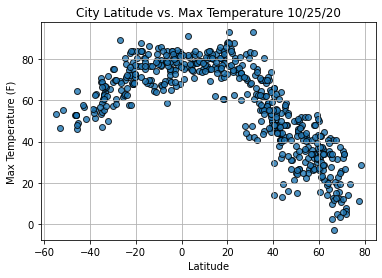

In [10]:
# Import the time module.
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

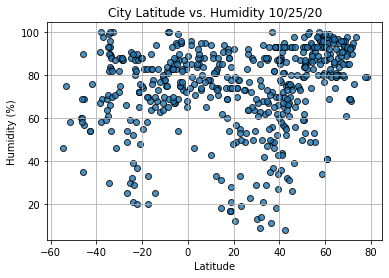

In [11]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

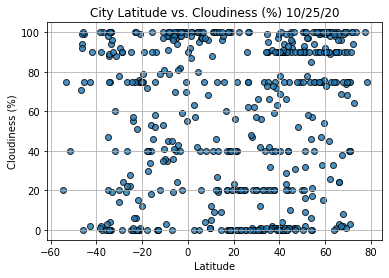

In [12]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

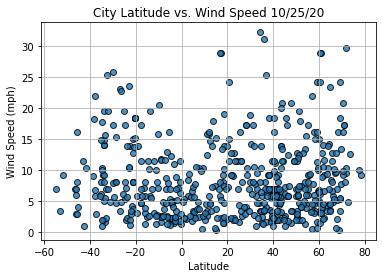

In [13]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

In [14]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [15]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

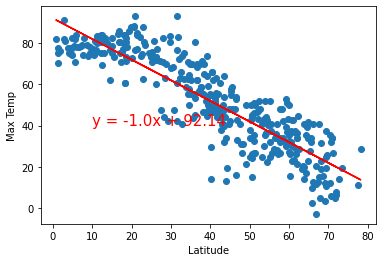

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere for Maximum Temperature", 'Max Temp',(10,40))
plt.show()

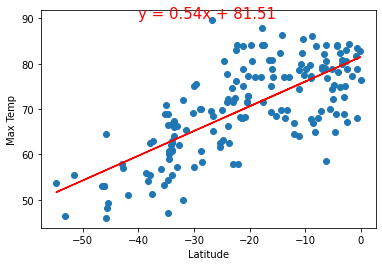

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-40,90))
plt.title = "Linear Regression on the Southern Hemisphere for Maximum Temperature"

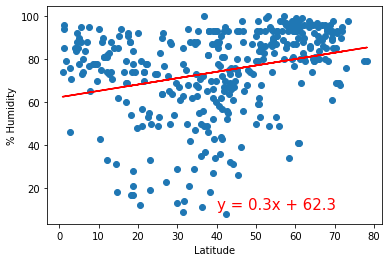

LinregressResult(slope=0.296094131064772, intercept=62.30318568353517, rvalue=0.2769126293838357, pvalue=8.18832704567187e-08, stderr=0.05407660449941432)

In [18]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere for % Humidity", '% Humidity',(40,10))

linregress(x_values, y_values)

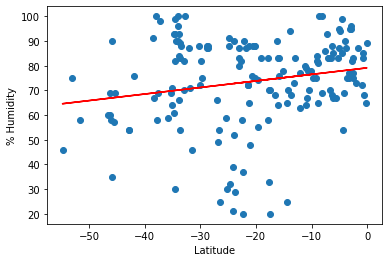

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, 
                       y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', 
                       '% Humidity',
                       (-50,15))

linregress(x_values, y_values)
plt.show()

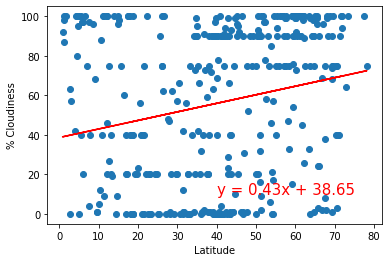

LinregressResult(slope=0.4322706434452282, intercept=38.65337835902724, rvalue=0.216705634466847, pvalue=3.1252347111644114e-05, stderr=0.10249134657443733)

In [20]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, 
                       y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', 
                       '% Cloudiness',
                       (40,10))

linregress(x_values, y_values)

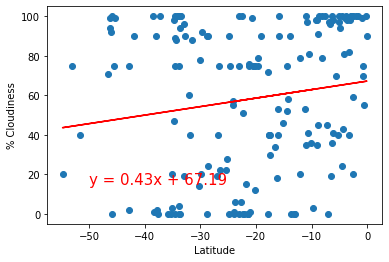

LinregressResult(slope=0.4300002730107444, intercept=67.18556980772094, rvalue=0.15566595388519827, pvalue=0.04265883900833619, stderr=0.2105201949839887)

In [21]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, 
                       y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', 
                       '% Cloudiness',
                       (-50,15))

linregress(x_values, y_values)

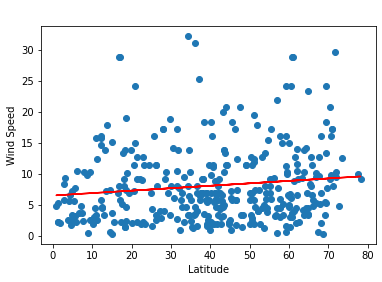

LinregressResult(slope=0.039304425731235826, intercept=6.547222274043404, rvalue=0.12762807083529365, pvalue=0.014965493972997797, stderr=0.01607590496647194)

In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))
plt.show()
linregress(x_values, y_values)

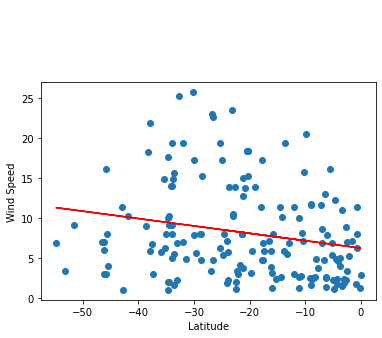

LinregressResult(slope=-0.09236807923336862, intercept=6.245928749563969, rvalue=-0.21250870666276206, pvalue=0.005399466266992436, stderr=0.032768446827286274)

In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))

linregress(x_values, y_values)